# 이미지에서의 텐서

- 머신 러닝에서 텐서는 벡터와 행렬을 더 높은 차원으로 일반화하는 다차원 배열
- 이미지는 픽셀값의 배열로 자연스럽게 표현됨
    - 그레이 스케일 이미지는 2차원 배열로 볼 수 있음
        - 텐서의 원소들의 각 값은 픽셀 강도에 해당
        - 256 x 256 사이즈의 그레이 스케일 이미지는 (256, 256) 모양(shape)의 탠서
        
    - RGB 형식으로 표현되는 컬러 이미지는 3차원 배열로 생각할 수 있음
        - 이미지의 높이, 너비, 색상 채널
        - 256 x 256 사이즈의 RGB 컬러 이미지는 (256, 256, 3) 모양의 텐서
        
    - 이미지 배치로 작업할 때나 영상의 경우 4차원 텐서를 사용하기도 함
        - 이 때 첫 번째 차원은 배치에 포함된 이미지 수
        - 100개 이미지 배치의 256 x 256 사이즈의 컬러 이미지는 (100, 256, 256, 3) 모양의 텐서

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 이미지 불러오기

In [2]:
image = tf.io.read_file("./image/ai-009-1.jpg")
image

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x06\x04\x04\x04\x05\x04\x06\x05\x05\x06\t\x06\x05\x06\t\x0b\x08\x06\x06\x08\x0b\x0c\n\n\x0b\n\n\x0c\x10\x0c\x0c\x0c\x0c\x0c\x0c\x10\x0c\x0e\x0f\x10\x0f\x0e\x0c\x13\x13\x14\x14\x13\x13\x1c\x1b\x1b\x1b\x1c\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x01\x07\x07\x07\r\x0c\r\x18\x10\x10\x18\x1a\x15\x11\x15\x1a\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\xff\xc2\x00\x11\x08\x03\xb8\x04\x18\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x02\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x01\x03\x04\x05\x06\x07\x08\xff\xda\x00\x08\x01\x01\x00\x00\x00\x00\xfc\xc6\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xd3\n\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

- 파일의 내용은 이미지 변수에 원시 바이너리 문자열(raw binary string)로 저장됨
    - 원시 바이너리 문자열 : 해석이나 변환 없이 파일의 내용을 나타내는 바이트 시퀀스

In [3]:
image = tf.image.decode_jpeg(image, channels = 3)
image

<tf.Tensor: shape=(952, 1048, 3), dtype=uint8, numpy=
array([[[ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39],
        ...,
        [ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39]],

       [[ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39],
        ...,
        [ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39]],

       [[ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39],
        ...,
        [ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39]],

       ...,

       [[ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39],
        ...,
        [ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39]],

       [[ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39],
        ...,
        [ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39]],

       [[ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39],
        ...,
        [ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39]]], dtype=uint8)>

- tf.image.decode_jpeg
    - 원시 바이너리 문자열을 숫자 텐서로 디코딩
    - channels = 3 : 컬러 이미지의 RGB채널에 해당하는 3채널 형식으로 이미지를 디코딩
    
    - 출력 결과
        - tf.Tensor : 출력물이 텐서플로의 텐서 객체임을 표현
        - shape = (952, 1048, 3) : 텐서의 사이즈
            - 높이 952, 너비 1048, 색상 채널의 개수는 3(RGB)
        - dtype = uint8 : 텐서 내 요소의 데이터 유형
            - uint8 : 값이 0에서 255 사이의 8비트 부호 없는 정수
        - numpy = array : 이미지의 실제 픽셀 값

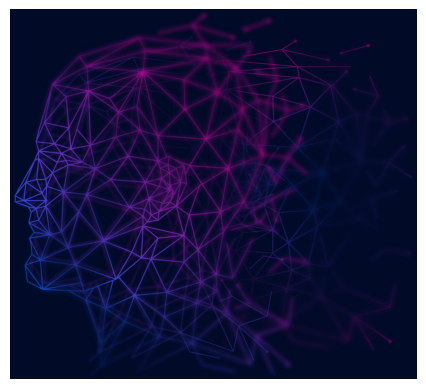

In [5]:
plt.imshow(image)
plt.axis("off")
plt.show()

- plt.imshow()
    - 이미지 텐서를 가져와 렌더링 처리하여 이미지 뷰어에서 볼 수 있는 것처럼 이미지를 표시

- tf.keras.preprocessing.image
    - 이미지 파일을 텐서로 변환

- tf.image.decode_jpeg를 포함한 함수들로 이미지 디코딩

- 이미지 변환
    - tf.image.resize(사이즈 조정)
    - tf.image.flip_left_right(뒤집기) 등의 표준 이미지 변환을 위한 다양한 함수가 있음

## 다양한 색 공간

- 텐서플로에서는 색 공간의 변환과 조작을 쉽게 할 수 있는 다양한 도구를 제공
- 디지털 영역에서는 주로 RGB로 이미지를 표시하지만 이미지 처리에서 HSV 및 그레이 스케일과 같은 다른 색공간으로 변경하여 처리하기도 함
    - 예) 그레이 스케일 이미지는 채널이 3개인 RGB보다 계산 효율이 더 좋음

### tf.random.uniform

- 랜덤한 값을 가진 텐서를 생성
- 생성된 랜덤 텐서는 알고리즘 성능을 평가할 때 사용되는 임시 이미지 데이터를 생성하거나 시각화 작업에서 색상 패턴 실험에서 사용이 됨

In [2]:
# 샘플 RGB 이미지
rgb_image = tf.random.uniform([100, 100, 3], maxval = 255, dtype = tf.float32)
print(rgb_image)

tf.Tensor(
[[[192.09447  210.20886  235.78246 ]
  [ 25.236696  33.814114 100.20223 ]
  [204.08052  153.28432  241.33496 ]
  ...
  [ 29.549038  33.5287   188.31439 ]
  [ 77.47161   54.914654  76.11666 ]
  [ 73.20721  169.81374  151.8072  ]]

 [[128.42235  131.00612  245.25021 ]
  [ 78.182236  22.913136 166.51224 ]
  [ 93.227905 216.25111  217.76926 ]
  ...
  [149.00703   62.158096  14.441171]
  [ 67.551895  53.43252  134.06024 ]
  [218.65501  136.03833   78.27273 ]]

 [[208.72539   43.956528 119.11522 ]
  [ 70.10332  105.65017  171.31256 ]
  [196.9496    49.400692 132.78078 ]
  ...
  [188.30449  140.84723  156.96313 ]
  [ 70.94359   49.671696 215.33067 ]
  [128.42076  213.6444    41.84211 ]]

 ...

 [[ 64.70475  164.64258  241.02274 ]
  [176.9987    79.71288  204.14554 ]
  [158.78804   94.81546   59.336582]
  ...
  [245.812    252.27296  101.53998 ]
  [ 64.91754  198.93294  195.31593 ]
  [253.2314   177.54642    4.282887]]

 [[ 89.85898  121.399925 163.92636 ]
  [245.70543  233.13373   

- tf.random.uniform([100, 100, 3], maxval = 255, dtype = tf.float32)
    - [100, 100, 3] 모양의 랜덤 텐서를 생성
    - 3개의 색상 채널이 있는 100 x 100 픽셀 이미지
    - maxval = 255 : 각 채널에 대해 생성된 임의의 값이 [0, 255] 범위에 속하도록 설정

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


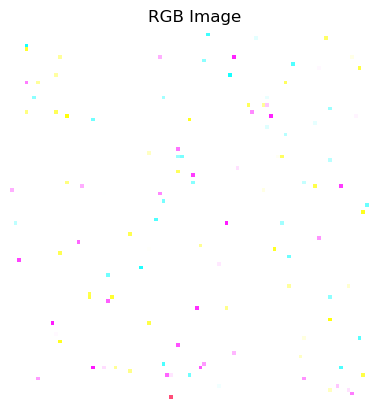

In [3]:
plt.imshow(rgb_image)
plt.title("RGB Image")
plt.axis("off")
plt.show()

### tf.image.rgb_to_grayscale

- RGB 이미지를 그레이 스케일로 변환

In [4]:
grayscale_image = tf.image.rgb_to_grayscale(rgb_image)

In [5]:
grayscale_image.shape

TensorShape([100, 100, 1])

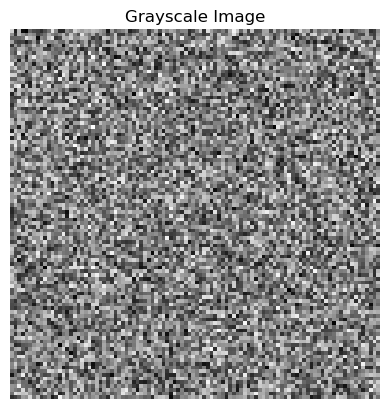

In [6]:
plt.imshow(grayscale_image.numpy().squeeze(), cmap = "gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

- rgb_to_grayscale함수는 RGB 이미지를 인수로 받아 그레이 스케일 이미지를 반환함
    - RGB 이미지를 그레이 스케일로 변경하는 공식
        - grayscale = R x 0.299 + G * 0.587 + B x 0.114

In [7]:
# 그레이 스케일 변경 구현
R = rgb_image[0][0][0] * 0.299
G = rgb_image[0][0][1] * 0.587
B = rgb_image[0][0][2] * 0.114
Y = R + G + B
print(grayscale_image[0][0], Y)

tf.Tensor([207.68883], shape=(1,), dtype=float32) tf.Tensor(207.70804, shape=(), dtype=float32)


### tf.image.rgb_to_hsv

- RGB 이미지를 HSV로 변화하는 데 사용
- HSV 색 공간은 특정 색상을 추출하거나 배경과 전경을 좀 더 직관적으로 구분할 수 있음

In [8]:
hsv_image = tf.image.rgb_to_hsv(rgb_image)

hue_channel = hsv_image[:, :, 0] # 색조 채널만 추출

In [9]:
hsv_image.shape

TensorShape([100, 100, 3])

In [10]:
hue_channel.shape

TensorShape([100, 100])

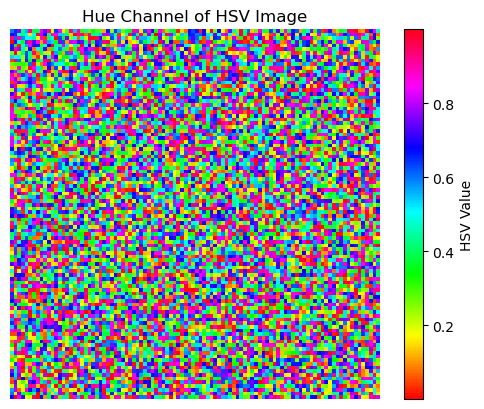

In [11]:
plt.imshow(hue_channel, cmap = "hsv")
plt.title("Hue Channel of HSV Image")
plt.axis("off")
plt.colorbar(label = "HSV Value")
plt.show()

## 픽셀 값의 정규화와 표준화

- 이미지를 처리할 때 픽셀 값의 사이즈를 조정하는 방식은 모델의 성능과 수렴 속도 모두에 많은 영향을 미칠 수 있음
- 픽셀 값의 사이즈를 조정하는 데 사용되는 두 가지 일반적인 방식은 정규화와 표준화

### 정규화

- 픽셀 값을 [0, 1] 범위로 스케일링하는 것
    - 픽셀 값이 0에서 255사이인 8비트 이미지의 경우 각 픽셀을 255로 나누기만 하면 정규화가 완료됨
    
- rgb_image 텐서를 스칼라 값 255로 나누면 텐서플로는 스칼라 값을 rgb_image 텐서 모양에 자동으로 브로드캐스트 하여 255 값으로 채워진 (100, 100, 3)의 텐서를 생성하여 나눔
    - 텐서의 모든 값에 255를 나누는 것

In [12]:
rgb_image.shape

TensorShape([100, 100, 3])

In [13]:
rgb_image

<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
array([[[192.09447 , 210.20886 , 235.78246 ],
        [ 25.236696,  33.814114, 100.20223 ],
        [204.08052 , 153.28432 , 241.33496 ],
        ...,
        [ 29.549038,  33.5287  , 188.31439 ],
        [ 77.47161 ,  54.914654,  76.11666 ],
        [ 73.20721 , 169.81374 , 151.8072  ]],

       [[128.42235 , 131.00612 , 245.25021 ],
        [ 78.182236,  22.913136, 166.51224 ],
        [ 93.227905, 216.25111 , 217.76926 ],
        ...,
        [149.00703 ,  62.158096,  14.441171],
        [ 67.551895,  53.43252 , 134.06024 ],
        [218.65501 , 136.03833 ,  78.27273 ]],

       [[208.72539 ,  43.956528, 119.11522 ],
        [ 70.10332 , 105.65017 , 171.31256 ],
        [196.9496  ,  49.400692, 132.78078 ],
        ...,
        [188.30449 , 140.84723 , 156.96313 ],
        [ 70.94359 ,  49.671696, 215.33067 ],
        [128.42076 , 213.6444  ,  41.84211 ]],

       ...,

       [[ 64.70475 , 164.64258 , 241.02274 ],
        [176.

In [14]:
normalized_image = rgb_image / 255

In [15]:
rgb_image[0, 0], normalized_image[0, 0]

(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([192.09447, 210.20886, 235.78246], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.75331163, 0.8243485 , 0.9246371 ], dtype=float32)>)

### 표준화

- 이미지의 픽셀 값을 평균 0, 표준 편차 1이 되도록 스케일링
- 최적화 환경을 좀 더 균일하게 만들어 학습 과정을 가속화 할 수 있으므로 중요한 전처리 단계
    - 이미지의 픽셀 값을 일반적으로 [0, 255] 범위에 있음
    - 그러나 이미지마다 픽셀값의 분포는 크게 다를 수 있어 학습 과정에서 어려움을 겪을 수 있음
    - 픽셀 값을 표준화하면 이미지의 중앙이 0이되고 대부분 픽셀 값이 대략 [-1, 1] 범위에 속하게 되어 훈련에 좀 더 일관된 데이터 세트를 제공할 수 있음

In [16]:
mean = tf.reduce_mean(rgb_image) # 텐서의 평균 값 계산
stddev = tf.math.reduce_std(rgb_image) # 텐서의 표준 편차를 계산

In [17]:
standardized_image = (rgb_image - mean) / stddev
rgb_image[0, 0], standardized_image[0, 0]

(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([192.09447, 210.20886, 235.78246], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.8820006, 1.1285214, 1.4765552], dtype=float32)>)